In [1]:
import gc
import json
import pandas as pd
import numpy as np
import seaborn as sns

from tqdm import tqdm_notebook
from glob import glob

from sklearn.decomposition import TruncatedSVD, NMF
from utils import loadpkl

%matplotlib inline

/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [15]:
# load feathers
files = sorted(glob('../features/*.feather'))
df = pd.concat([pd.read_feather(f) for f in tqdm_notebook(files, mininterval=60)], axis=1)

# split train & test
train_df = df[df['click_mode'].notnull()]
test_df = df[df['click_mode'].isnull()]

/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/pandas/io/feather_format.py:124: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  nthreads=int_use_threads)
/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/pyarrow/pandas_compat.py:751: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [17]:
# load pkls
df = loadpkl('../features/plans.pkl')
queries = loadpkl('../features/queries.pkl')
profiles = loadpkl('../features/profiles.pkl')
queries_pred = loadpkl('../features/queries_pred.pkl')

In [3]:
# merge
df = pd.merge(df, queries, on='sid', how='left')
df = pd.merge(df, profiles, on='pid', how='left')

del queries, profiles
gc.collect()

train_df = df[df['click_mode'].notnull()]

In [18]:
queries_pred

,pred_queries0,pred_queries1,pred_queries2,pred_queries3,pred_queries4,pred_queries5,pred_queries6,pred_queries7,pred_queries8,pred_queries9,pred_queries10,pred_queries11,sid
0,0.054814,0.137392,0.364367,0.047526,0.011931,0.047289,0.015821,0.093956,0.001649,0.141739,0.078594,0.004923,3000821
1,0.316548,0.177925,0.089112,0.036690,0.011370,0.037526,0.020699,0.201526,0.001808,0.073032,0.024254,0.009510,3085857
2,0.089787,0.279884,0.132169,0.030055,0.011594,0.044832,0.008428,0.178379,0.001134,0.154076,0.059503,0.010159,2944522
3,0.163882,0.109917,0.177554,0.094808,0.015593,0.036533,0.011673,0.272840,0.000922,0.071004,0.040697,0.004578,559931
4,0.038813,0.032630,0.795541,0.013701,0.022732,0.024914,0.004164,0.033110,0.000900,0.023128,0.007383,0.002984,2819352
5,0.220268,0.110256,0.120393,0.038200,0.023255,0.134198,0.009879,0.182986,0.001706,0.068451,0.016334,0.074073,2754575
6,0.124346,0.293878,0.062620,0.022838,0.084964,0.046636,0.006731,0.295609,0.000789,0.022701,0.007208,0.031681,2224795
7,0.032432,0.109945,0.139911,0.033997,0.006633,0.491261,0.052309,0.061942,0.001008,0.057500,0.009363,0.003700,1598541
8,0.107355,0.116542,0.239410,0.085381,0.034938,0.152215,0.012450,0.097612,0.002692,0.113814,0.029552,0.008038,676316
9,0.076652,0.156468,0.175613,0.054363,0.027288,0.067365,0.026036,0.166329,0.001426,0.219619,0.017761,0.011080,1068802


In [15]:
sub_preds = np.zeros((df.shape[0],12))
sub_preds = pd.DataFrame(sub_preds)
sub_preds.columns = ['pred_queries{}'.format(c) for c in sub_preds.columns]
sub_preds['sid'] = df['sid'].values

In [16]:
sub_preds

,pred_queries0,pred_queries1,pred_queries2,pred_queries3,pred_queries4,pred_queries5,pred_queries6,pred_queries7,pred_queries8,pred_queries9,pred_queries10,pred_queries11,sid
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1709112
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3327773
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3285959
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1616170
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,351369
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,749203
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3005789
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1897386
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,845203
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536341


/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


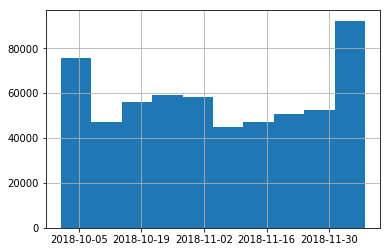

In [20]:
df.plan_time.sort_values().hist()